# LINEAR REGRESSION MODEL 

**This is a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
cd

C:\Users\HP


In [3]:
df= pd.read_csv('Desktop/data_mid_bootcamp_project_regression/regression_data_clean.csv')

In [4]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df.shape

(21597, 21)

**There are 21597 rows and 21 columns in our data frame.

In [7]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

**There are no missing values in our data 

In [8]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [9]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [10]:
numericals = df.select_dtypes(np.number)
numericals.head() 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [11]:
numericals.nunique()

id               21420
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [12]:
categorical = df.select_dtypes(object)

In [13]:
categorical.nunique()

date    372
dtype: int64

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

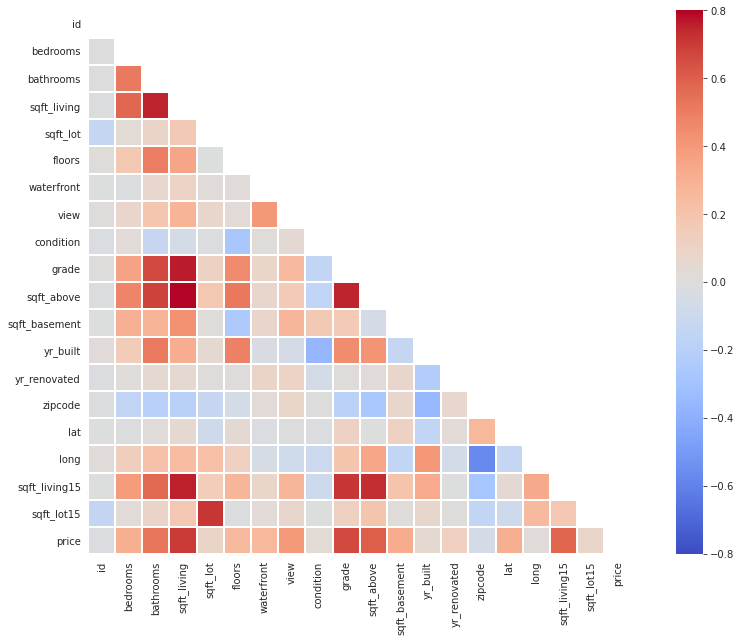

In [15]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [16]:
df.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


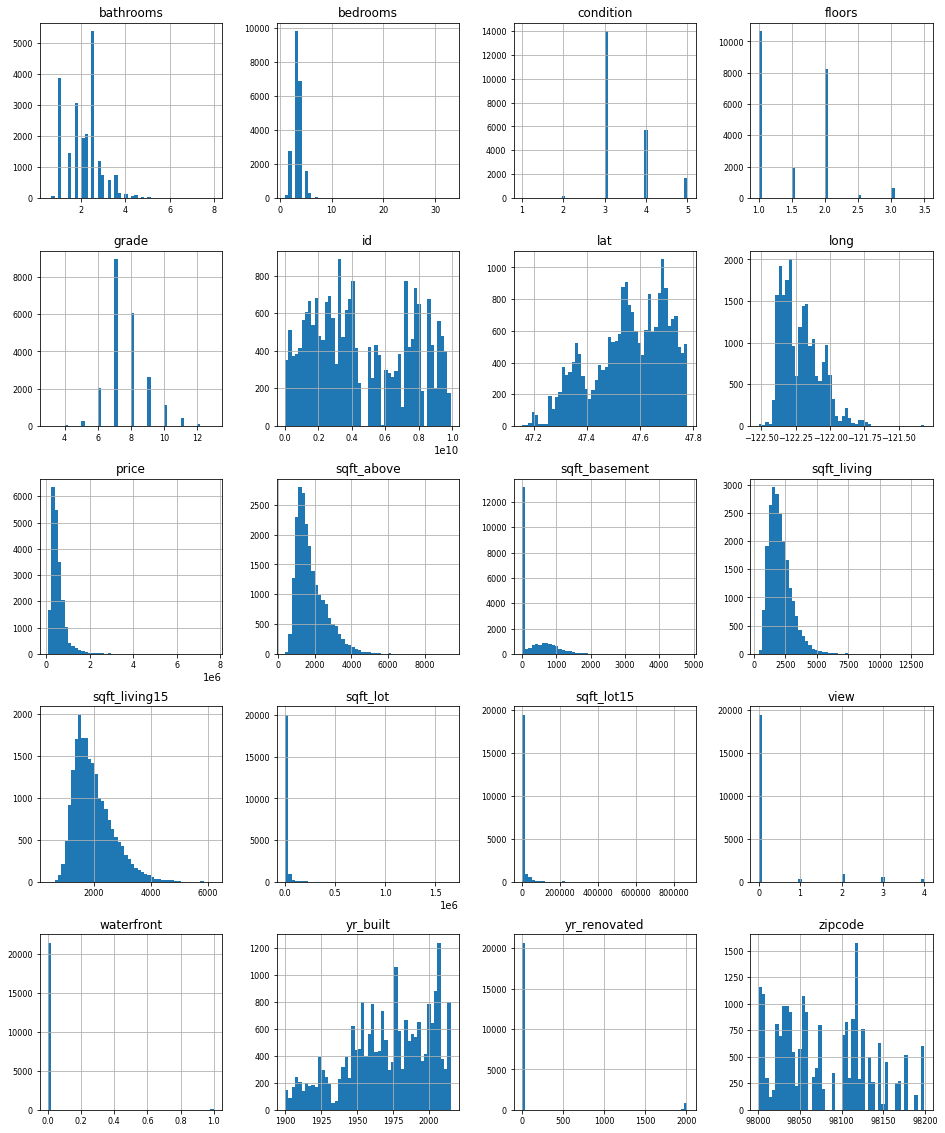

In [17]:
numericals.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

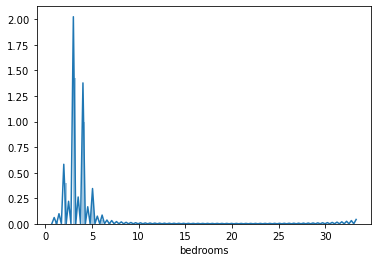

In [18]:
sns.distplot(df["bedrooms"], bins = 100);

In [19]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**The apartment with 33 bedrooms seems like an outlier

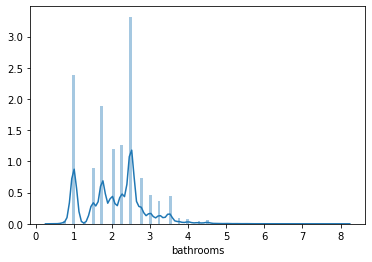

In [20]:
sns.distplot(df["bathrooms"], bins = 100);

In [21]:
from matplotlib.colors import BASE_COLORS

IndexError: list index out of range

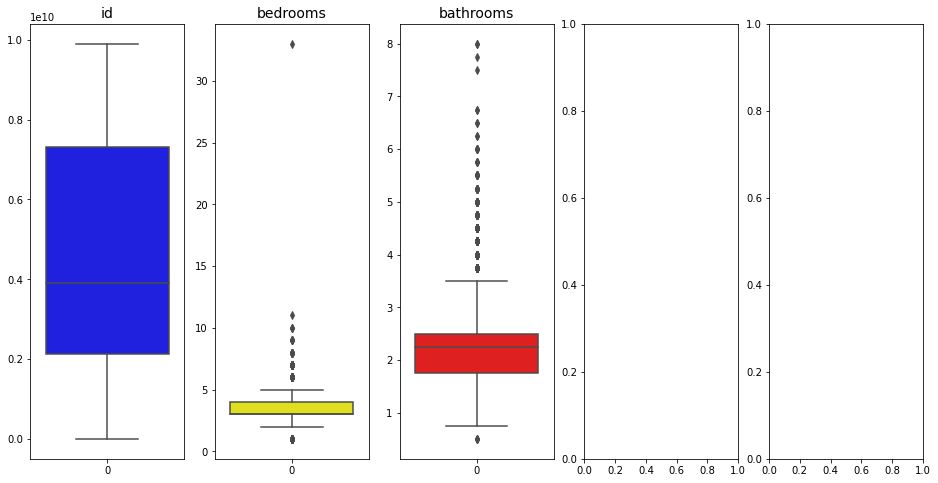

In [24]:
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 5, figsize=(16,8))


for i, col in enumerate(numericals[:5]):
    sns.boxplot(data = numericals[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

In [ ]:
 sns.boxplot(df['bedrooms'])

In [25]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

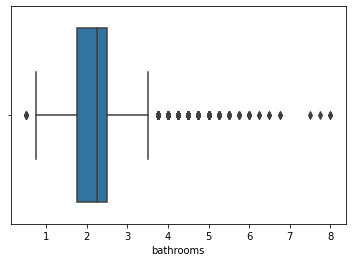

In [26]:
sns.boxplot(df['bathrooms'])

In [27]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

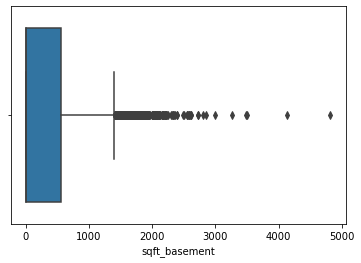

In [30]:
sns.boxplot(df['sqft_basement'])

In [31]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

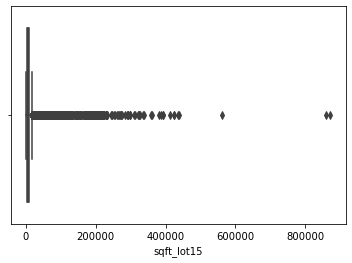

In [32]:
sns.boxplot(df['sqft_lot15'])

In [33]:
df['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

## Outliers

After inspection, a log transormation was done to control for outliers

In [34]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN  
df['bedrooms_log'] = list(map(log_transfom_clean_, df['bedrooms']))

In [35]:
df['bedrooms_log'] = df['bedrooms_log'].fillna(np.mean(df['bedrooms_log']))

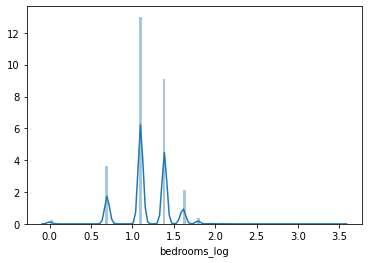

In [36]:
sns.distplot(df['bedrooms_log'], bins=100)
plt.show()

In [37]:
df['bedrooms_log'].value_counts()

1.098612    9824
1.386294    6882
0.693147    2760
1.609438    1601
1.791759     272
0.000000     196
1.945910      38
2.079442      13
2.197225       6
2.302585       3
3.496508       1
2.397895       1
Name: bedrooms_log, dtype: int64

In [38]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN   
df['bathrooms_log'] = list(map(log_transfom_clean_, df['bathrooms']))

In [39]:
df['bathrooms_log'] = df['bedrooms_log'].fillna(np.mean(df['bathrooms_log']))

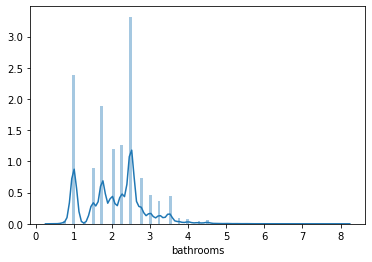

In [40]:
sns.distplot(df['bathrooms'], bins=100)
plt.show()

In [41]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN  
df['sqft_basement_log'] = list(map(log_transfom_clean_, df['sqft_basement']))

<ipython-input-41-6d707bde9e1a>:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x)


In [42]:
df['sqft_basement_log'] = df['sqft_basement_log'].fillna(np.mean(df['sqft_basement_log']))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


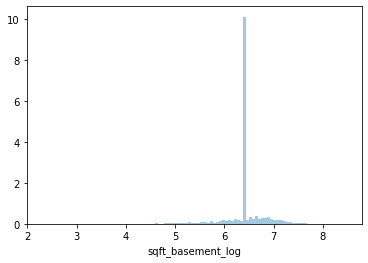

In [43]:
sns.distplot(df['sqft_basement_log'], bins=100)
plt.show()

In [44]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN   
df['sqft_lot15_log'] = list(map(log_transfom_clean_, df['sqft_lot15']))

In [45]:
df['sqft_lot15_log'] = df['sqft_lot15_log'].fillna(np.mean(df['sqft_lot15_log']))

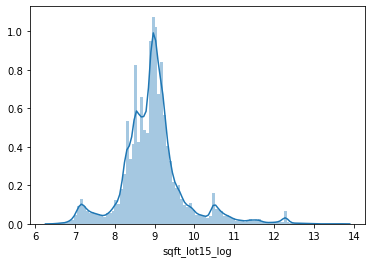

In [46]:
sns.distplot(df['sqft_lot15_log'], bins=100)
plt.show()

In [47]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,1.098612,1.098612,6.439042,8.639411
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,1.098612,1.098612,5.991465,8.941022
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,0.693147,0.693147,6.439042,8.994917
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,1.386294,1.386294,6.813445,8.517193
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,1.098612,1.098612,6.439042,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,360000,1.098612,1.098612,6.439042,7.319202
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,400000,1.386294,1.386294,6.439042,8.881836
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,402101,0.693147,0.693147,6.439042,7.604396
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,400000,1.098612,1.098612,6.439042,7.160069


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   waterfront         21597 non-null  int64  
 8   view               21597 non-null  int64  
 9   condition          21597 non-null  int64  
 10  grade              21597 non-null  int64  
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  int64  
 13  yr_built           21597 non-null  int64  
 14  yr_renovated       21597 non-null  int64  
 15  zipcode            21597 non-null  int64  
 16  lat                215

In [49]:
df1 = df.drop(['id','date', 'sqft_living','sqft_lot','sqft_above', 'bedrooms', 'bathrooms','sqft_lot15','sqft_basement'], axis=1)
df1

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log
0,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,221900,1.098612,1.098612,6.439042,8.639411
1,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,538000,1.098612,1.098612,5.991465,8.941022
2,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,180000,0.693147,0.693147,6.439042,8.994917
3,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,604000,1.386294,1.386294,6.813445,8.517193
4,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,510000,1.098612,1.098612,6.439042,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530,360000,1.098612,1.098612,6.439042,7.319202
21593,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830,400000,1.386294,1.386294,6.439042,8.881836
21594,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020,402101,0.693147,0.693147,6.439042,7.604396
21595,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410,400000,1.098612,1.098612,6.439042,7.160069


In [50]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [51]:
numericals.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [52]:
df1

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log
0,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,221900,1.098612,1.098612,6.439042,8.639411
1,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,538000,1.098612,1.098612,5.991465,8.941022
2,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,180000,0.693147,0.693147,6.439042,8.994917
3,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,604000,1.386294,1.386294,6.813445,8.517193
4,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,510000,1.098612,1.098612,6.439042,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530,360000,1.098612,1.098612,6.439042,7.319202
21593,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830,400000,1.386294,1.386294,6.439042,8.881836
21594,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020,402101,0.693147,0.693147,6.439042,7.604396
21595,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410,400000,1.098612,1.098612,6.439042,7.160069




## Binning numerical Columns


**The column grade has 13 categories. It was binned/regrouped into 4 categories

In [53]:
##grade_labels = ['Low', 'Moderate', 'High', 'Very High']
#df1['grade'] = pd.cut(df1['grade'],4, labels=grade_labels)
#df1['grade'].value_counts()

grade_labels = ['very Low','low', 'Moderate', 'High', 'Very High', 'Excellent']
df1['grade'] = pd.cut(df1['grade'],6, labels=grade_labels)
df1['grade'].value_counts()

Moderate     15039
High          2615
low           2280
Very High     1533
Excellent      102
very Low        28
Name: grade, dtype: int64

In [54]:
df1

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log
0,1.0,0,0,3,Moderate,1955,0,98178,47.5112,-122.257,1340,221900,1.098612,1.098612,6.439042,8.639411
1,2.0,0,0,3,Moderate,1951,1991,98125,47.7210,-122.319,1690,538000,1.098612,1.098612,5.991465,8.941022
2,1.0,0,0,3,low,1933,0,98028,47.7379,-122.233,2720,180000,0.693147,0.693147,6.439042,8.994917
3,1.0,0,0,5,Moderate,1965,0,98136,47.5208,-122.393,1360,604000,1.386294,1.386294,6.813445,8.517193
4,1.0,0,0,3,Moderate,1987,0,98074,47.6168,-122.045,1800,510000,1.098612,1.098612,6.439042,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0,0,3,Moderate,2009,0,98103,47.6993,-122.346,1530,360000,1.098612,1.098612,6.439042,7.319202
21593,2.0,0,0,3,Moderate,2014,0,98146,47.5107,-122.362,1830,400000,1.386294,1.386294,6.439042,8.881836
21594,2.0,0,0,3,Moderate,2009,0,98144,47.5944,-122.299,1020,402101,0.693147,0.693147,6.439042,7.604396
21595,2.0,0,0,3,Moderate,2004,0,98027,47.5345,-122.069,1410,400000,1.098612,1.098612,6.439042,7.160069


# Creating dummy Variables

In [55]:
df2 = pd.get_dummies(df1, columns = ['view','condition','grade'], drop_first=True)

In [56]:
df2['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

# create a dummy variable to show whether the property was renovated or not

In [57]:
df2_copy=df2

In [58]:
def renovated(x):
    if x == 0:
        return 0
    else:
        return 1
df2_copy['yr_renovated'] = list(map(renovated,df2_copy['yr_renovated']))

In [59]:
df2_copy

,floors,waterfront,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,bedrooms_log,...,view_4,condition_2,condition_3,condition_4,condition_5,grade_low,grade_Moderate,grade_High,grade_Very High,grade_Excellent
0,1.0,0,1955,0,98178,47.5112,-122.257,1340,221900,1.098612,...,0,0,1,0,0,0,1,0,0,0
1,2.0,0,1951,1,98125,47.7210,-122.319,1690,538000,1.098612,...,0,0,1,0,0,0,1,0,0,0
2,1.0,0,1933,0,98028,47.7379,-122.233,2720,180000,0.693147,...,0,0,1,0,0,1,0,0,0,0
3,1.0,0,1965,0,98136,47.5208,-122.393,1360,604000,1.386294,...,0,0,0,0,1,0,1,0,0,0
4,1.0,0,1987,0,98074,47.6168,-122.045,1800,510000,1.098612,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0,2009,0,98103,47.6993,-122.346,1530,360000,1.098612,...,0,0,1,0,0,0,1,0,0,0
21593,2.0,0,2014,0,98146,47.5107,-122.362,1830,400000,1.386294,...,0,0,1,0,0,0,1,0,0,0
21594,2.0,0,2009,0,98144,47.5944,-122.299,1020,402101,0.693147,...,0,0,1,0,0,0,1,0,0,0
21595,2.0,0,2004,0,98027,47.5345,-122.069,1410,400000,1.098612,...,0,0,1,0,0,0,1,0,0,0


In [60]:
def renovated(x):
    if x == 0:
        return 0
    else:
        return 1
df2['yr_renovated'] = list(map(renovated,df2['yr_renovated']))

In [61]:
df2

,floors,waterfront,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,bedrooms_log,...,view_4,condition_2,condition_3,condition_4,condition_5,grade_low,grade_Moderate,grade_High,grade_Very High,grade_Excellent
0,1.0,0,1955,0,98178,47.5112,-122.257,1340,221900,1.098612,...,0,0,1,0,0,0,1,0,0,0
1,2.0,0,1951,1,98125,47.7210,-122.319,1690,538000,1.098612,...,0,0,1,0,0,0,1,0,0,0
2,1.0,0,1933,0,98028,47.7379,-122.233,2720,180000,0.693147,...,0,0,1,0,0,1,0,0,0,0
3,1.0,0,1965,0,98136,47.5208,-122.393,1360,604000,1.386294,...,0,0,0,0,1,0,1,0,0,0
4,1.0,0,1987,0,98074,47.6168,-122.045,1800,510000,1.098612,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0,2009,0,98103,47.6993,-122.346,1530,360000,1.098612,...,0,0,1,0,0,0,1,0,0,0
21593,2.0,0,2014,0,98146,47.5107,-122.362,1830,400000,1.386294,...,0,0,1,0,0,0,1,0,0,0
21594,2.0,0,2009,0,98144,47.5944,-122.299,1020,402101,0.693147,...,0,0,1,0,0,0,1,0,0,0
21595,2.0,0,2004,0,98027,47.5345,-122.069,1410,400000,1.098612,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
final_df=df3

In [63]:
df3 = pd.get_dummies(df2, columns = ['yr_renovated','waterfront'])

In [113]:
final_df=df3

In [98]:
X = df3.drop(['price'],axis=1)

y = df3[['price']]

In [99]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21592,360000
21593,400000
21594,402101
21595,400000


In [100]:
X

,floors,yr_built,zipcode,lat,long,sqft_living15,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log,...,condition_5,grade_low,grade_Moderate,grade_High,grade_Very High,grade_Excellent,yr_renovated_0,yr_renovated_1,waterfront_0,waterfront_1
0,1.0,1955,98178,47.5112,-122.257,1340,1.098612,1.098612,6.439042,8.639411,...,0,0,1,0,0,0,1,0,1,0
1,2.0,1951,98125,47.7210,-122.319,1690,1.098612,1.098612,5.991465,8.941022,...,0,0,1,0,0,0,0,1,1,0
2,1.0,1933,98028,47.7379,-122.233,2720,0.693147,0.693147,6.439042,8.994917,...,0,1,0,0,0,0,1,0,1,0
3,1.0,1965,98136,47.5208,-122.393,1360,1.386294,1.386294,6.813445,8.517193,...,1,0,1,0,0,0,1,0,1,0
4,1.0,1987,98074,47.6168,-122.045,1800,1.098612,1.098612,6.439042,8.923058,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,2009,98103,47.6993,-122.346,1530,1.098612,1.098612,6.439042,7.319202,...,0,0,1,0,0,0,1,0,1,0
21593,2.0,2014,98146,47.5107,-122.362,1830,1.386294,1.386294,6.439042,8.881836,...,0,0,1,0,0,0,1,0,1,0
21594,2.0,2009,98144,47.5944,-122.299,1020,0.693147,0.693147,6.439042,7.604396,...,0,0,1,0,0,0,1,0,1,0
21595,2.0,2004,98027,47.5345,-122.069,1410,1.098612,1.098612,6.439042,7.160069,...,0,0,1,0,0,0,1,0,1,0


In [110]:
X_test

,floors,yr_built,zipcode,lat,long,sqft_living15,bedrooms_log,bathrooms_log,sqft_basement_log,sqft_lot15_log,...,condition_5,grade_low,grade_Moderate,grade_High,grade_Very High,grade_Excellent,yr_renovated_0,yr_renovated_1,waterfront_0,waterfront_1
156,2.0,1996,98056,47.5250,-122.172,2640,1.609438,1.609438,7.286192,9.523325,...,0,0,0,1,0,0,1,0,1,0
15572,1.0,1977,98033,47.6970,-122.169,2110,1.386294,1.386294,6.522093,9.035987,...,1,0,1,0,0,0,1,0,1,0
2080,2.0,1999,98052,47.6868,-122.108,3140,1.098612,1.098612,6.439042,9.058587,...,0,0,0,0,1,0,1,0,1,0
17522,1.0,1970,98001,47.2878,-122.251,1550,1.098612,1.098612,6.439042,9.392662,...,0,1,0,0,0,0,1,0,1,0
8360,1.0,1965,98092,47.3382,-122.196,2210,1.386294,1.386294,6.802395,10.385636,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19235,1.0,1987,98038,47.3657,-122.047,1610,1.098612,1.098612,6.439042,8.961879,...,0,0,1,0,0,0,1,0,1,0
4301,1.0,1975,98058,47.4457,-122.128,2050,1.098612,1.098612,6.439042,8.883224,...,0,0,1,0,0,0,1,0,1,0
6353,2.0,1977,98033,47.6888,-122.201,2350,1.386294,1.386294,6.439042,9.062420,...,0,0,1,0,0,0,1,0,1,0
16236,1.0,1965,98008,47.6290,-122.117,1310,1.386294,1.386294,6.684612,8.974112,...,1,0,1,0,0,0,1,0,1,0


In [101]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
pd.DataFrame(x_standardized)

(21597, 27)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.915552,-0.544678,1.869645,-0.352894,-0.305695,-0.943676,-0.279725,-0.279725,0.000000,-0.395459,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
1,0.937431,-0.680850,0.879210,1.161376,-0.746286,-0.432887,-0.279725,-0.279725,-1.121310,-0.024288,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,-4.757006,4.757006,0.087205,-0.087205
2,-0.915552,-1.293626,-0.933473,1.283355,-0.135144,1.070292,-1.711651,-1.711651,0.000000,0.042037,...,-0.292395,2.910733,-1.514341,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
3,-0.915552,-0.204247,1.084772,-0.283604,-1.272151,-0.914488,0.736243,0.736243,0.937985,-0.545863,...,3.420036,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
4,-0.915552,0.544700,-0.073850,0.409293,1.200840,-0.272353,-0.279725,-0.279725,0.000000,-0.046395,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.790414,1.293648,0.468086,1.004752,-0.938156,-0.666390,-0.279725,-0.279725,0.000000,-2.020143,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
21593,0.937431,1.463863,1.271647,-0.356503,-1.051856,-0.228571,0.736243,0.736243,0.000000,-0.097123,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
21594,0.937431,1.293648,1.234272,0.247617,-0.604160,-1.410683,-1.711651,-1.711651,0.000000,-1.669176,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205
21595,0.937431,1.123432,-0.952160,-0.184722,1.030289,-0.841518,-0.279725,-0.279725,0.000000,-2.215977,...,-0.292395,-0.343556,0.660353,-0.371163,-0.276415,-0.068886,0.210216,-0.210216,0.087205,-0.087205


# splitting the data

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f' the mean absolute value for our model is',mae)
print(f' the mean square value for our model is',mse)
print(f' the r2 score for our model is',r2)

 the mean absolute value for our model is 127298.76460826198
 the mean square value for our model is 39565052906.35347
 the r2 score for our model is 0.678878261338224


In [105]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [ 3.3e+04 -4.5e+04 -3.1e+04  9.1e+04 -2.9e+04  8.6e+04  2.5e+04  0.0e+00
  2.0e+04 -1.5e+04  1.6e+04  2.2e+04  2.8e+04  3.8e+04  1.1e+04  6.5e+04
  7.5e+04  6.1e+04 -1.5e+03  3.6e+04  8.6e+04  1.4e+05  1.1e+05 -2.2e+04
  0.0e+00 -4.7e+04  1.4e-09] [542901.]
Coefficient: 33442.345443166436
Intercept: [542901.]


# Comparing regression models

In [106]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [107]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6658209109059394, Test -> 0.678874475326583
Lasso: Train -> 0.6658204573377584, Test -> 0.6788862180364567
Ridge: Train -> 0.6656881287195939, Test -> 0.6791792873975169
ElasticNet: Train -> 0.4179661587424589, Test -> 0.4435175848251407


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227122609246083.22, tolerance: 211584678311.85208
  model = cd_fast.enet_coordinate_descent(


In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.6004221152728302, Test -> 0.4113142266080019


In [109]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9993226509291128, Test -> 0.6947605362550667


In [120]:
import plotly.express as px
imp = pd.Series(model.coef_, index=X_train.columns)
px.line(imp)